# Introducción

En esta práctica vamos a examinar un conjunto de datos que contiene información biométrica y de salud, con el fin de determinar la presencia o ausencia del hábito de fumar en los individuos a partir de señales bio-saludables. El archivo smoking.csv que utilizaremos incluye características diferentes, tales como edad, peso, altura, niveles de glucosa en ayuno y colesterol, entre otros.

Este análisis nos permitirá aplicar y profundizar en técnicas de Machine Learning como SVM y kNN, así como en métodos de ingeniería de características, esenciales para la preparación y optimización de los datos para la modelización. Abordaremos la transformación de variables numéricas y categóricas, y exploraremos cómo estos procesos afectan el rendimiento de los modelos predictivos.

Comenzaremos con una exploración de los datos para entender su estructura y las relaciones entre las diferentes variables. Posteriormente, prepararemos los datos para su análisis, aplicando técnicas de preprocesamiento y generando nuevas características que nos ayudarán a capturar la complejidad del conjunto de datos y a mejorar la precisión de nuestros modelos predictivos.

## El Dataset

El conjunto de datos con el que trabajaremos incluye una serie de atributos relacionados con la salud y mediciones biométricas. Aquí está la descripción de cada atributo y su posible asociación con el hábito de fumar:

* **ID**: Identificador único para cada individuo en el dataset. No tiene asociación directa con el hábito de fumar.
* **Gender**: Género del individuo, que puede tener variaciones en la prevalencia del hábito de fumar.
* **Age**: Edad del individuo, presentada en intervalos de 5 años. La prevalencia del hábito de fumar a menudo disminuye con la edad.
* **Height**: Altura en centímetros. No tiene una asociación directa con el hábito de fumar.
* **Weight**: Peso en kilogramos. El fumar puede influir en el peso y varía individualmente.
* **Waist**: Circunferencia de la cintura en centímetros. El fumar puede afectar la distribución de la grasa corporal.
* **Eyesight** (Left/Right): Medición de la agudeza visual para el ojo izquierdo/derecho. No tiene asociación directa con el hábito de fumar.
* **Hearing** (Left/Right): Medición de la audición para el oído izquierdo/derecho. No tiene asociación directa con el hábito de fumar.
* **Systolic BP**: Presión arterial sistólica. El fumar puede afectar la presión arterial.
* **Diastolic BP**: Presión arterial diastólica. El fumar puede afectar la presión arterial.
* **Fasting Blood Sugar**: Nivel de azúcar en sangre en ayuno. El fumar puede impactar los niveles de azúcar en sangre.
Cholesterol (Total): Nivel total de colesterol. El fumar puede influir en los niveles de colesterol.
* **Triglyceride**: Nivel de triglicéridos. El fumar puede influir en los niveles de triglicéridos.
* **HDL Cholesterol**: Nivel de colesterol HDL. El fumar puede disminuir los niveles de colesterol HDL.
* **LDL Cholesterol**: Nivel de colesterol LDL. El fumar puede influir en los niveles de colesterol LDL.
* **Hemoglobin**: Nivel de hemoglobina. No tiene asociación directa con el hábito de fumar.
* **Urine Protein**: Presencia de proteína en la orina. El fumar puede impactar la función renal.
* **Serum Creatinine**: Nivel de creatinina en suero. El fumar puede impactar la función renal.
* **AST/ALT**: Niveles de transaminasas glutámico oxaloacéticas. El fumar puede impactar la función hepática.
* **GTP**: Nivel de γ-GTP. El fumar puede impactar el nivel de enzimas hepáticas.
* **Oral Exam Status**: Estado del examen oral. El fumar puede impactar la salud oral.
* **Dental Caries**: Presencia de caries dentales. El fumar puede afectar la salud dental.
* **Tartar Status**: Estado del tártaro. El fumar puede afectar la salud dental.
* **Blood Group**: Grupo sanguíneo del individuo.
* **Smoking Status**: Indica si el individuo es fumador o no. Esta es la variable objetivo que indica directamente el hábito de fumar.

Es importante comprender estas asociaciones, ya que nos ayudarán a determinar qué características pueden ser más relevantes para nuestros modelos predictivos y cómo podríamos necesitar transformarlas para mejorar la precisión de nuestras predicciones.







# 0. Importación de librerías

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
path = "./datasets/habitos_fumadores.csv"
data = pd.read_csv(path)

# Exploración Inicial de Datos

**Ejercicio 1** - Declara el tamaño del dataset. Con respecto a las columnas, identifica qué variables son numéricas y cuáles son categóricas. ¿Cuál es el individuo menos pesado? ¿Y el más alto? Dibuja un histograma de hombres y mujeres atendiendo a si fuman o no.

In [39]:
data.shape[0]

55692

Separamos el dataset entre las variables categoricas y numéricas

In [40]:
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])

Aún así, nos quedan variables que son categóricas pero estan clasificadas como numericas, como "dental caries" o "smoking" que representan un si o no.

In [41]:
for col in numeric_data.columns:
    if (data[col].unique().size == 2 and 0 in data[col].unique() and 1 in data[col].unique()):
        categorical_data[col] = data[col]
        numeric_data.drop(col, axis=1, inplace=True)

In [42]:
categorical_data.columns

Index(['gender', 'oral', 'tartar', 'blood_group', 'dental caries', 'smoking'], dtype='object')

In [43]:
numeric_data.columns

Index(['ID', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp'],
      dtype='object')

Individuo menos pesado

In [44]:
data.sort_values(by='weight(kg)', ascending=True).head(1)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,blood_group
22126,27630,F,60,145,30,53.0,0.5,1.0,1.0,1.0,...,1.0,0.4,22.0,14.0,14.0,Y,0,N,0,0+


Individuo mas alto

In [45]:
data.sort_values(by='height(cm)', ascending=False).head(1)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,blood_group
55625,55360,M,35,190,85,80.0,1.0,0.9,1.0,1.0,...,1.0,0.9,22.0,14.0,19.0,Y,0,Y,1,A-


Histograma mujeres/hombres antendiendo a si fuman o no

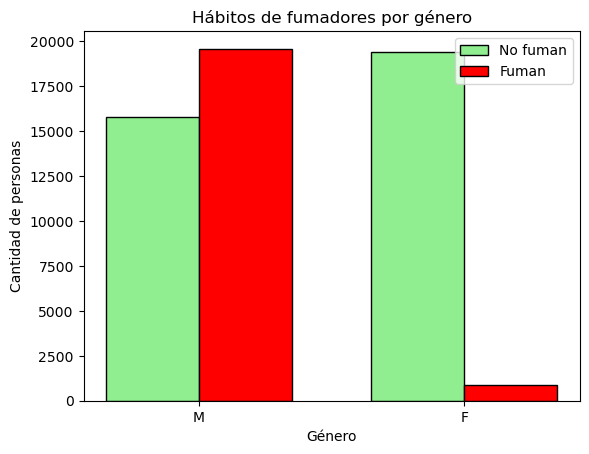

In [46]:
m_data = data[data['gender'] == "M"]
f_data = data[data['gender'] == "F"]
width = 0.35
labels = ['M', 'F']
no_smoking = [m_data['smoking'].size - m_data['smoking'].sum(), f_data['smoking'].size - f_data['smoking'].sum()]
smoking = [m_data['smoking'].sum(), f_data['smoking'].sum()]

fig, ax = plt.subplots()
ax.bar(np.arange(len(labels)) - width/2, no_smoking, width, label='No fuman', color='lightgreen', edgecolor='black')
ax.bar(np.arange(len(labels)) + width/2, smoking, width, label='Fuman', color='red', edgecolor='black')

ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
plt.title('Hábitos de fumadores por género')
plt.ylabel('Cantidad de personas')
plt.xlabel('Género')
plt.legend()
plt.show()

**Ejercicio 2** - Sobre la variable continua "age" aplica una binarización por umbralización, tomando como umbral la media de las edades, incluyendo esta variable en el Dataframe como "age_bin". Haz un conteo de las dos categorías resultantes en la variable binarizada. Sobre la variable continua "Cholesterol" aplica una agrupación por cuantiles usando percentiles. Incluye esta variable en el dataframe como "Cholesterol_per".

In [47]:
threshold = data['age'].mean()
data["age_bin"] = data['age'].apply(lambda x: 1 if x > threshold else 0)

In [48]:
above_threshold = data[data['age_bin'] == 1].shape[0]
above_threshold

26845

In [49]:
below_threshold = data[data['age_bin'] == 0].shape[0]
below_threshold

28847

In [50]:
data["Cholesterol_bin"] = pd.qcut(data["Cholesterol"], 4 , labels=False)

**Ejercicio 3** - Sobre la variable continua "fasting blood sugar" aplica un escalado máximo-mínimo. Dibuja un histograma de la variable original y otro histograma de la variable tras el escalado: ¿qué conclusiones sacas viendo ambos histogramas?

In [51]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
fasting_blood_sugar_scaled = min_max_scaler.fit_transform(data["fasting blood sugar"].values.reshape(-1, 1))

Histograma de la variable original

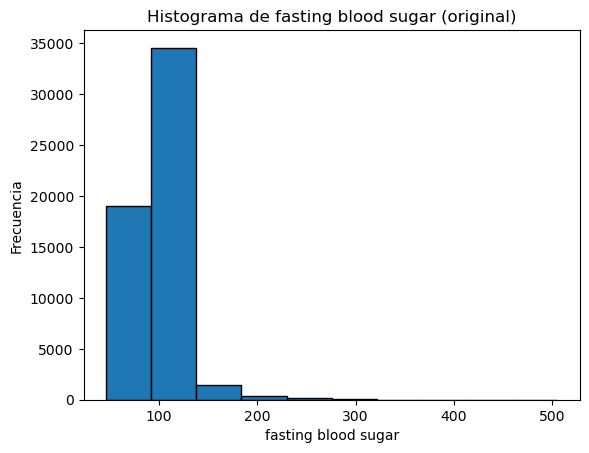

In [52]:
plt.hist(data["fasting blood sugar"], edgecolor='black')
plt.title('Histograma de fasting blood sugar (original)')
plt.ylabel('Frecuencia')
plt.xlabel('fasting blood sugar')
plt.show()

Histograma de la variable escalada

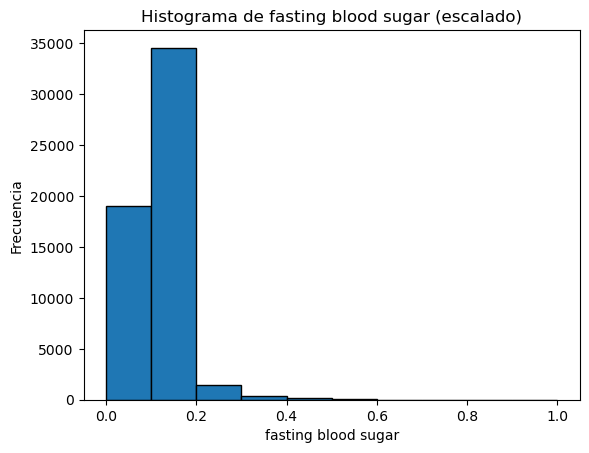

In [53]:
plt.hist(fasting_blood_sugar_scaled, edgecolor='black')
plt.xlabel('fasting blood sugar')
plt.ylabel('Frecuencia')
plt.title('Histograma de fasting blood sugar (escalado)')
plt.show()

**Conclusion:** Podemos ver como la distribucion de los valores tras el escalado min max es similar al que obtuvimos usando la variable original. Con el escalado mínimo-máximo hemos conseguido que la variable "fasting blood sugar" esté normalizada en un rango específico, al mismo tiempo que mantenemos su relacion con el resto de variables

**Ejercicio 4** - Aisla la variable discreta "blood_group" en un dataframe que se componga de esa única variable. Genera 3 dataframes diferentes:

*   Uno con variables generadas mediante el método one-hot encoding
*   Otro con variables generadas mediante el método dummy coding
*   Un último con variables generadas mediante el método effect coding



In [54]:
blood_group = data[['blood_group']].copy()
blood_group.head()

,blood_group
0,A+
1,A-
2,0+
3,A+
4,A-


In [55]:
blood_group_hot_encoded = pd.get_dummies(blood_group, columns=['blood_group'])
blood_group_hot_encoded.head()

,blood_group_0+,blood_group_A+,blood_group_A-,blood_group_B+
0,False,True,False,False
1,False,False,True,False
2,True,False,False,False
3,False,True,False,False
4,False,False,True,False


In [56]:
blood_group_dummy_coded = pd.get_dummies(blood_group, columns=['blood_group'], drop_first=True)
blood_group_dummy_coded.head()

,blood_group_A+,blood_group_A-,blood_group_B+
0,True,False,False
1,False,True,False
2,False,False,False
3,True,False,False
4,False,True,False


In [57]:
blood_group_effect_coded = blood_group_dummy_coded.copy()
# Casteamos a enteros los valores de la columna para que los datos sean consistentes y no tengamos una mezcla de valores booleanos y enteros.
for col in blood_group_effect_coded.columns:
    blood_group_effect_coded[col] = blood_group_effect_coded[col].astype(int)
all_false = (blood_group_effect_coded == 0).all(axis=1)
blood_group_effect_coded.loc[all_false, :] = -1
blood_group_effect_coded.head()

,blood_group_A+,blood_group_A-,blood_group_B+
0,1,0,0
1,0,1,0
2,-1,-1,-1
3,1,0,0
4,0,1,0


# Preprocesamiento de Datos

**Ejercicio 5**: En esta sección, continuar con la preparación de nuestro conjunto de datos para el análisis. Basándose en las tareas realizadas anteriormente:

* **División del conjunto de datos**: Segmentar los datos utilizando la librería scikitlearn con la semilla reproducible "1234", utilizando un 80% de conjunto de entrenamiento y un 20% de conjunto de testeo. Indicar el tamaño de ambos conjuntos.

In [58]:
from sklearn.model_selection import train_test_split
X = data.drop('smoking',axis=1).values
y = data['smoking'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8, test_size=0.2, random_state=1234, stratify=y)

In [59]:
print(f'Conjunto de entrenamiento: x={X_train.shape[0]} y={y_train.shape[0]}')
print(f'Conjunto de test: x={X_test.shape[0]} y={y_test.shape[0]}')

Conjunto de entrenamiento: x=44553 y=44553
Conjunto de test: x=11139 y=11139


# Análisis Exploratorio de Datos (EDA)

**Ejercicio 6**: Explorar profundamente los datos para obtener insights que guíen la construcción del modelo:

* **Distribución de variables**: Para la variable "age" aplicar una agrupación por cuantiles utilizando deciles. Para cada grupo calcular el WoE asociado de forma manual. Calcular el IV de la variable discretizada con respecto al target. ¿Crees que es una variable importante de cara a su relación con la variable objetivo (smoking)?

* **Relaciones entre variables**: Realiza el mismo ejercicio para la variable "Height". Segun los resultados obtenidos, ¿cuál crees que tiene un poder predictor más fuerte?

In [60]:
df_age_woes = data[['age', 'smoking']].copy()
df_age_woes["age_group"] = pd.qcut(df_age_woes["age"], 10, labels=False, duplicates='drop')

age_analysis = df_age_woes.groupby('age_group').agg(
    total=('smoking', 'count'),
    events=('smoking', 'sum')
).reset_index()

age_analysis['non_events'] = age_analysis['total'] - age_analysis['events']
age_analysis['event_rate'] = age_analysis['events'] / age_analysis['events'].sum()
age_analysis['non_event_rate'] = age_analysis['non_events'] / age_analysis['non_events'].sum()
age_analysis['WoE'] = np.log(age_analysis['event_rate'] / age_analysis['non_event_rate'])
age_analysis['IV'] = (age_analysis['event_rate'] - age_analysis['non_event_rate']) * age_analysis['WoE']
age_iv = age_analysis['IV'].sum()

age_iv

0.13897309882693892

In [61]:
df_height_woes = data[['height(cm)', 'smoking']].copy()
df_height_woes["height_group"] = pd.qcut(df_height_woes["height(cm)"], 10, labels=False, duplicates='drop')

height_analysis = df_height_woes.groupby('height_group').agg(
    total=('smoking', 'count'),
    events=('smoking', 'sum')
).reset_index()

height_analysis['non_events'] = height_analysis['total'] - height_analysis['events']
height_analysis['event_rate'] = height_analysis['events'] / height_analysis['events'].sum()
height_analysis['non_event_rate'] = height_analysis['non_events'] / height_analysis['non_events'].sum()
height_analysis['WoE'] = np.log(height_analysis['event_rate'] / height_analysis['non_event_rate'])
height_analysis['IV'] = (height_analysis['event_rate'] - height_analysis['non_event_rate']) * height_analysis['WoE']
height_iv = height_analysis['IV'].sum()

height_iv

1.0507101721284542

Los resultados del análisis muestran los valores de Information Value (IV) para las variables agrupadas:
-	IV para Edad (Age): 0.139
-	IV para Altura (Height): 1.051

Interpretación:
-	La variable Height tiene un IV significativamente mayor que Age, lo que indica que podría ser un predictor más fuerte para la variable objetivo (smoking).
-	Según los rangos típicos del IV:
-	Un IV entre 0.1 y 0.3 indica una capacidad predictiva débil a moderada.
-	Un IV mayor a 0.5 (como en el caso de Height) indica una capacidad predictiva fuerte.

Por lo tanto, Height parece tener mayor relevancia como predictor en comparación con Age.

# Selección de Características

**Ejercicio 7**: Evaluar y seleccionar las características más informativas para el modelo:

* **Determinación de características relevantes**: Utilizando el atributo ".corr()" del DataFrame en formato pandas enuncia las 3 variables que más se correlen con la variable objetivo. ¿Qué interpretación lógica puedes dar a la correlación obtenida con respecto a dichas variables?


In [62]:
data.corr(numeric_only=True).loc['smoking', :].sort_values(ascending=False).head(4)[1:]

hemoglobin    0.400678
height(cm)    0.396675
weight(kg)    0.302780
Name: smoking, dtype: float64

La correlación más fuerte con la hemoglobina puede reflejar cómo fumar afecta a la sangre, mientras que las correlaciones con la altura y el peso podrían estar influenciadas por patrones sociales y culturales.

Con esto, hemos obtenido las correlaciones positivas, pero tambien sería recomendable conocer si aquellas que son "más negativas" son importantes:

In [63]:
data.corr(numeric_only=True).loc['smoking', :].sort_values(ascending=True).head()

HDL           -0.178470
age           -0.162557
age_bin       -0.132229
LDL           -0.045220
Cholesterol   -0.028548
Name: smoking, dtype: float64

Podemos ver como existen correlaciones inversas con el HDL, la edad, el LDL y el colesterol total, pero los valores absolutos no superan a los obtenidos en el paso anterior.

# Construcción del Modelo

**Ejercicio 8**: Elegir y aplicar el modelo de clasificación adecuado a partir de las opciones vistas en clase:

* **Entrenamiento**: Capacitar el modelo seleccionado con el conjunto de entrenamiento mediante el algoritmo kNN o el SVM. Justifica tu respuesta.


Dado que los datos parecen tener una mezcla de variables continuas (por ejemplo, altura, peso, hemoglobina) y categóricas, y queremos maximizar la capacidad de generalización, SVM con un kernel no lineal es una buena elección. SVM puede manejar mejor relaciones complejas entre las variables, lo que es útil si queremos una mayor precisión.

In [64]:
data_for_training = pd.read_csv(path)
# Eliminamos la columna ID ya que no tiene importancia en nuestro entrenamiento.
data_for_training.drop(["ID"], axis=1, inplace=True)
#Hacemos la codificacion de las variables categoricas usando dummy encoding.
for col in categorical_data.columns:
    if(col != 'smoking'):
        data_for_training = pd.concat([data_for_training, pd.get_dummies(data_for_training[col], prefix=col,  drop_first=True)], axis=1)
        data_for_training.drop(col, axis=1, inplace=True)
y = data_for_training['smoking'].values
data_for_training.drop('smoking', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data_for_training.values, y, train_size=0.8, test_size=0.2, random_state=1234, stratify=y)

In [65]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
print(f'SVM (rbf) Train accuracy {model.score(X_train, y_train)}')
print(f'SVM (rbf) Test accuracy {model.score(X_test, y_test)}')

SVM (rbf) Train accuracy 0.7342490965815994
SVM (rbf) Test accuracy 0.727803213933028


En este caso, hemos entrenado el SVM con el kernel RBF y los parámetros por defecto.

# Evaluación del Modelo

**Ejercicio 9**: Evaluar el rendimiento del modelo es clave para entender su efectividad. Se incluye:

* **Comparación de métricas**: Observar y analizar métricas de rendimiento vistas en clase tales como el accuracy, la precisión, recall, F1-score, AUC-ROC y matriz de confusión. ¿Qué conclusiones se pueden extraer de cada una de estás métricas?

* **Validación cruzada**: Utilizar la validación cruzada para optimizar hiperparámetros y confirmar la estabilidad del modelo. ¿Cuál es la mejor configuración de parámetros?

In [66]:
from sklearn.metrics import confusion_matrix
svm_y_pred = model.predict(X_test)
confusion_matrix(y_test,svm_y_pred)

array([[5955, 1093],
       [1939, 2152]])

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test,svm_y_pred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.80      7048
           1       0.66      0.53      0.59      4091

    accuracy                           0.73     11139
   macro avg       0.71      0.69      0.69     11139
weighted avg       0.72      0.73      0.72     11139



El modelo tiene un desempeño razonable en general, pero tiene un mejor rendimiento en la clase 0 (negativa), mientras que el desempeño en la clase 1 (positiva) es considerablemente más débil, especialmente en términos de recall.

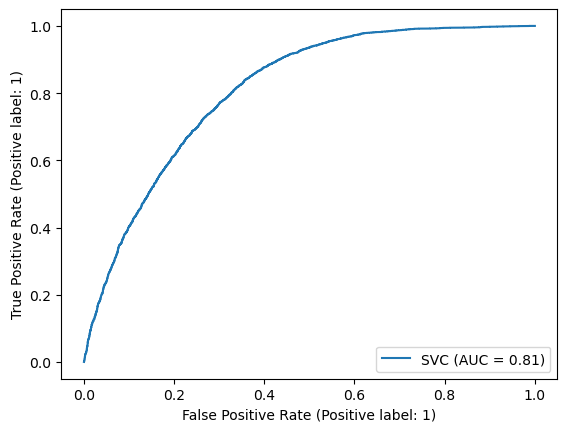

In [68]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

El modelo tiene un desempeño sólido en términos de discriminación entre clases, reflejado en el AUC de 0.85.

**Preparacion del dataset**

 Para aislar la validacion cruzada de los cambios hecho anteriormente, volveremos a cargar el dataset. También, haremos un nuevo analisis de la correlacion de las variables para eliminar aquellas que tengan menos correlación. Estableceremos un umbral de 0.1, y eliminaremos las columnas cuyo valor absoluto no llegue a ese valor, para evitar eliminar aquellas columnas que tengan una correlacion negativa como vimos anteriormente

In [69]:
data_for_training = pd.read_csv(path)
correlations = data_for_training.corr(numeric_only=True).loc['smoking', :]
absolute_correlations = correlations.abs().sort_values(ascending=False)
columns_to_drop = absolute_correlations[absolute_correlations < 0.1].index.tolist()
columns_to_drop

['ALT',
 'systolic',
 'eyesight(right)',
 'eyesight(left)',
 'AST',
 'LDL',
 'Cholesterol',
 'hearing(left)',
 'hearing(right)',
 'Urine protein',
 'ID']

In [70]:

data_for_training.drop(columns_to_drop, axis=1, inplace=True)
#Hacemos la codificacion de las variables categoricas usando dummy encoding.
for col in categorical_data.columns:
    if(col != 'smoking'):
        data_for_training = pd.concat([data_for_training, pd.get_dummies(data_for_training[col], prefix=col,  drop_first=True)], axis=1)
        data_for_training.drop(col, axis=1, inplace=True)
y = data_for_training['smoking'].values
data_for_training.drop('smoking', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data_for_training.values, y, train_size=0.8, test_size=0.2, random_state=1234, stratify=y)

Preparamos la validacion cruzada. En este caso, crearemos un pipeline con los escaladores y el modelo de SVM. Esto lo haremos para comparar tambien dos tipos de scalers, el Standard y el MinMax. 

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Paso 1: Escalado de los datos
    ('svc', SVC())                # Paso 2: Modelo SVC
])

param_grid = {
    'svc__C': [0.1, 1, 10, 100],       # Regularización
    'svc__gamma': [1, 0.1, 0.01, 0.001],  # Influencia del kernel
    'svc__kernel': ['rbf']            # Kernel RBF
}

# Crear el modelo de búsqueda de hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Ajustar el modelo utilizando validación cruzada
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10, 100],
                         'svc__gamma': [1, 0.1, 0.01, 0.001],
                         'svc__kernel': ['rbf']},
             scoring='accuracy', verbose=1)

Obtenemos los mejores parametreos y el mejor modelo y mostramos los datos del entrenamiento

In [72]:
# Obtener los mejores parámetros y evaluar el modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones con el modelo optimizado
y_pred = best_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Mejores parámetros encontrados:", best_params)
print("Precisión del modelo optimizado:", accuracy)
print("\nReporte de clasificación:\n", classification_rep)

Mejores parámetros encontrados: {'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Precisión del modelo optimizado: 0.7540174162851243

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80      7048
           1       0.65      0.73      0.69      4091

    accuracy                           0.75     11139
   macro avg       0.74      0.75      0.74     11139
weighted avg       0.76      0.75      0.76     11139



# Interpretación de Resultados y Conclusiones

**Ejercicio 10**: Analizar la influencia de cada característica y propuestas de mejora del modelo.

* Según lo examinado en el modelo, ¿Cuál crees que es la característica más
importante? Justifica tu respuesta.
* ¿Cómo crees que podrías mejorar el modelo en futuras iteraciones?

